In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.subplots as subplots
sns.set()
import gc
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
# Data
portfolio = pd.read_json('portfolio.json', orient='records', lines=True)
profile = pd.read_json('profile.json', orient='records', lines=True)
transcript = pd.read_json('transcript.json', orient='records', lines=True)
portfolio.shape, profile.shape, transcript.shape

((10, 6), (17000, 5), (306534, 4))

In [3]:
print(portfolio.info())
portfolio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes
None


,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [4]:
print(profile.info())
profile.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB
None


,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
9,None,118,8974fc5686fe429db53ddde067b88302,20161122,NaN


In [5]:
print(transcript.info())
transcript.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB
None


,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
5,389bc3fa690240e798340f5a15918d5c,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0
6,c4863c7985cf408faee930f111475da3,offer received,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},0
7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},0
8,aa4862eba776480b8bb9c68455b8c2e1,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
9,31dda685af34476cad5bc968bdb01c53,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0


In [6]:
def show_missing_vals(df, encoded_col=None, encoded_val=None):
    missing = df.isnull().sum().reset_index() # num missing
    missing.columns = ['feat', 'n_missing']
    
    if encoded_col: # if missing vals of a col were encoded
        missing.loc[missing.feat == encoded_col, 'n_missing'] = (df[encoded_col] == encoded_val).sum()
        
    missing['pct_missing'] = np.round(100 * missing.n_missing / df.shape[0], 2) # % missing
    return missing
     
# Only user data had missing values
show_missing_vals(profile, 'age', 118) # missing `age` vals were encoded as 118

# Drop users with missing information
missing_users = profile.loc[profile.gender.isnull(), 'id'].values # users to drop
missing_user_events = transcript[transcript.person.isin(missing_users)].index.values # event idx to drop

transcript.drop(missing_user_events, inplace=True) # drop events
profile.dropna(inplace=True) # drop users
profile.shape, transcript.shape

((14825, 5), (272762, 4))

In [7]:
def get_unique_vals(df_col, type_dict=False):
    
    if type_dict: # for dicts
        df_col = df_col.apply(lambda d: list(d.keys())) # get lists of keys
    return np.unique(np.concatenate(df_col.values)).tolist() # get unique vals

def extract_from_iterable_col(df, old_col, drop_old_col=True, unique_vals=None, unique_keys=None):
  
    df = df.copy()
    
    if unique_keys is not None: # for dicts
        for k in unique_keys:
            if ' ' not in k: # to skip duplicate key with space
                df[k] = df[old_col].apply(lambda d: d[k] if k in d # get dict val
                    else (d[k.replace('_', ' ')] if k.replace('_', ' ') in d # for duplicate key with space
                        else np.NaN)) # val is nan if key is not in dict
        
    elif unique_vals is not None: # for lists
        for v in unique_vals:
            new_col = df[old_col].apply(lambda lst: int(v in lst)) # 1 if val is in list else 0
            if np.var(new_col): # if new col is not constant
                df[v] = new_col # add new col

    if drop_old_col:
        df.drop(old_col, axis=1, inplace=True)
        
    return df


# Get unique values
channels = get_unique_vals(portfolio.channels) # unique channel vals from offer metadata
offer_keys = get_unique_vals(transcript.value, type_dict=True) # unique offer keys from event data
channels, offer_keys

(['email', 'mobile', 'social', 'web'],
 ['amount', 'offer id', 'offer_id', 'reward'])

In [8]:
# Extract channels from offer metadata
portfolio = extract_from_iterable_col(portfolio, 'channels', unique_vals=channels)
portfolio.head(10)

,reward,difficulty,duration,offer_type,id,mobile,social,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,1
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,0
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,0,1


In [9]:
# Extract dictionary values from event data
transcript = extract_from_iterable_col(transcript, 'value', unique_keys=offer_keys)
transcript.head(10)

,person,event,time,amount,offer_id,reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN
5,389bc3fa690240e798340f5a15918d5c,offer received,0,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN
7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,0,NaN,3f207df678b143eea3cee63160fa8bed,NaN
8,aa4862eba776480b8bb9c68455b8c2e1,offer received,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
9,31dda685af34476cad5bc968bdb01c53,offer received,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
12,4b0da7e80e5945209a1fdddfe813dbe0,offer received,0,NaN,ae264e3637204a6fb9bb56bc8210ddfd,NaN
13,c27e0d6ab72c455a8bb66d980963de60,offer received,0,NaN,3f207df678b143eea3cee63160fa8bed,NaN
14,d53717f5400c4e84affdaeda9dd926b3,offer received,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
15,f806632c011441378d4646567f357a21,offer received,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN


In [10]:
# Sort offer types in order of difficulty - informational < discount < bogo
portfolio.sort_values(['offer_type', 'difficulty', 'duration'], ascending=[False, True, False], inplace=True)
portfolio.reset_index(drop=True, inplace=True)

def create_map_dict(series):
  
    ids, idn = dict(), 1
    for s in series.unique():
        ids[s] = idn
        idn += 1
    return ids


def map_ids_to_num(series, map_dict):
    
    return series.map(map_dict)
    

# Create mappings for offer IDs and user IDs
offer_mapping = create_map_dict(portfolio.id)
user_mapping = create_map_dict(profile.id)

# Map offer IDs in offer metadata to integers
portfolio['offer_id'] = map_ids_to_num(portfolio.id, offer_mapping)
portfolio.drop('id', axis=1, inplace=True)
portfolio

,reward,difficulty,duration,offer_type,mobile,social,web,offer_id
0,0,0,4,informational,1,0,1,1
1,0,0,3,informational,1,1,0,2
2,3,7,7,discount,1,1,1,3
3,2,10,10,discount,1,1,1,4
4,2,10,7,discount,1,0,1,5
5,5,20,10,discount,0,0,1,6
6,5,5,7,bogo,1,0,1,7
7,5,5,5,bogo,1,1,1,8
8,10,10,7,bogo,1,1,0,9
9,10,10,5,bogo,1,1,1,10


In [11]:
# Map user IDs in user data to integers
profile['user_id'] = map_ids_to_num(profile.id, user_mapping)
profile.drop('id', axis=1, inplace=True)
profile.head(10)

,gender,age,became_member_on,income,user_id
1,F,55,20170715,112000.0,1
3,F,75,20170509,100000.0,2
5,M,68,20180426,70000.0,3
8,M,65,20180209,53000.0,4
12,M,58,20171111,51000.0,5
13,F,61,20170911,57000.0,6
14,M,26,20140213,46000.0,7
15,F,62,20160211,71000.0,8
16,M,49,20141113,52000.0,9
18,M,57,20171231,42000.0,10


In [12]:
# Map offer and user IDs in event data to integers
transcript['offer_id'] = map_ids_to_num(transcript.offer_id, offer_mapping)
transcript['user_id'] = map_ids_to_num(transcript.person, user_mapping)
transcript.drop('person', axis=1, inplace=True)

In [13]:
# Fill missing values with 0
transcript.fillna(0, inplace=True)
transcript.isnull().sum().sum()

0

In [14]:
# Drop duplicate events
transcript.drop_duplicates(inplace=True)
transcript.duplicated().sum()

0

In [15]:
# Columns to recast to integers
profile['income'] = profile.income.astype(int) # `income` in user data
transcript['offer_id'] = transcript.offer_id.astype(int) # `offer_id` in event data
transcript['reward'] = transcript.reward.astype(int) # `reward` in event data
transcript.head(10)

,event,time,amount,offer_id,reward,user_id
0,offer received,0,0.0,7,0,2
2,offer received,0,0.0,5,0,3
5,offer received,0,0.0,8,0,4
7,offer received,0,0.0,1,0,5
8,offer received,0,0.0,6,0,6
9,offer received,0,0.0,6,0,8
12,offer received,0,0.0,9,0,13
13,offer received,0,0.0,1,0,14
14,offer received,0,0.0,6,0,11729
15,offer received,0,0.0,4,0,15


In [16]:
# Convert `became_member_on` in user data to datetime and rename to `signup_date`
profile['signup_date'] = pd.to_datetime(profile.became_member_on.astype(str))
profile.drop('became_member_on', axis=1, inplace=True)
profile.head(10)

,gender,age,income,user_id,signup_date
1,F,55,112000,1,2017-07-15
3,F,75,100000,2,2017-05-09
5,M,68,70000,3,2018-04-26
8,M,65,53000,4,2018-02-09
12,M,58,51000,5,2017-11-11
13,F,61,57000,6,2017-09-11
14,M,26,46000,7,2014-02-13
15,F,62,71000,8,2016-02-11
16,M,49,52000,9,2014-11-13
18,M,57,42000,10,2017-12-31


In [17]:
def filter_for_events(event_list, event_df=transcript, event_col='event', 
                     cols_to_keep=['event', 'time', 'offer_id', 'user_id', 'amount'],
                     merge_with=None, merge_on=None):
    
    filtered_event = event_df.loc[event_df[event_col].isin(event_list), cols_to_keep].reset_index()
    
    if merge_with is not None:
        filtered_event = pd.merge(filtered_event, merge_with, on=merge_on, how='left')
        
    return filtered_event


# Filter for "offer received" events and left-merge with offer metadata
received_offers = filter_for_events(['offer received'], cols_to_keep=['time', 'user_id', 'offer_id'],
                                   merge_with=portfolio, merge_on='offer_id')

print(f'A total of {received_offers.shape[0]} offers were sent out to {received_offers.user_id.nunique()} users.\n')
received_offers.head(10)

A total of 66501 offers were sent out to 14820 users.



,index,time,user_id,offer_id,reward,difficulty,duration,offer_type,mobile,social,web
0,0,0,2,7,5,5,7,bogo,1,0,1
1,2,0,3,5,2,10,7,discount,1,0,1
2,5,0,4,8,5,5,5,bogo,1,1,1
3,7,0,5,1,0,0,4,informational,1,0,1
4,8,0,6,6,5,20,10,discount,0,0,1
5,9,0,8,6,5,20,10,discount,0,0,1
6,12,0,13,9,10,10,7,bogo,1,1,0
7,13,0,14,1,0,0,4,informational,1,0,1
8,14,0,11729,6,5,20,10,discount,0,0,1
9,15,0,15,4,2,10,10,discount,1,1,1


In [18]:
print('Offers received by type:', f'\n{received_offers.offer_type.value_counts()}')
print('\nOffers received by ID:', f'\n{received_offers.offer_id.value_counts()}')

Offers received by type: 
discount         26664
bogo             26537
informational    13300
Name: offer_type, dtype: int64

Offers received by ID: 
6     6726
7     6685
9     6683
1     6657
3     6655
4     6652
2     6643
5     6631
10    6593
8     6576
Name: offer_id, dtype: int64


In [19]:
# Filter for reward-offer events
offer_events = filter_for_events(['offer received', 'offer viewed', 'offer completed'],
                                 merge_with=portfolio, merge_on='offer_id')
offer_events = offer_events.query('offer_type != "informational"') # drop informational offers
offer_events.shape
offer_events.head()

,index,event,time,offer_id,user_id,amount,reward,difficulty,duration,offer_type,mobile,social,web
0,0,offer received,0,7,2,0.0,5,5,7,bogo,1,0,1
1,2,offer received,0,5,3,0.0,2,10,7,discount,1,0,1
2,5,offer received,0,8,4,0.0,5,5,5,bogo,1,1,1
4,8,offer received,0,6,6,0.0,5,20,10,discount,0,0,1
5,9,offer received,0,6,8,0.0,5,20,10,discount,0,0,1


In [20]:
def concat_str_cols(df, cols, sep='_', pref='', suff=''):
    
    if isinstance(sep, str):
        sep = [sep] * (len(cols) - 1) + [suff]
        
    new_col = pref
    for i in range(len(cols)):
        new_col += df[cols[i]].astype(str) + sep[i]
    return new_col


# Add expiration hour
offer_events['expire_time'] = offer_events.apply(lambda e: e.duration * 24 + e.time if e.event == 'offer received' else -1, axis=1)

# Concatenate offer ID and user ID to group offers
offer_events['oid_uid'] = concat_str_cols(offer_events, ['offer_id', 'user_id'])
offer_events = offer_events.sort_values(['oid_uid', 'index']).reset_index(drop=True)
offer_events.head(2)

,index,event,time,offer_id,user_id,amount,reward,difficulty,duration,offer_type,mobile,social,web,expire_time,oid_uid
0,91,offer received,0,10,100,0.0,10,10,5,bogo,1,1,1,120,10_100
1,15575,offer viewed,6,10,100,0.0,10,10,5,bogo,1,1,1,-1,10_100


In [36]:
def fill_with(view_val, comp_val, rows_to_fill, off_evt_df=offer_events, view_col='viewed', comp_col='completed'):
    
    for row in rows_to_fill:
        if view_val in [0, 1]:
            off_evt_df.loc[row, view_col] = view_val
        if comp_val in [0, 1]:
            off_evt_df.loc[row, comp_col] = comp_val
            
            
def go_to_event(curr_idx, delta=1, event_df=offer_events):
    
    next_idx = next_evt = curr_idx + delta
    if 0 <= next_idx < event_df.shape[0]:
        next_evt = event_df.iloc[next_idx]
    return next_idx, next_evt


# Create binary features to indicate whether the offer was viewed and completed
offer_events['viewed'] = -1
offer_events['completed'] = -1

In [37]:
# Fill `viewed` and `completed` values
for idx, ids, evt in offer_events[['oid_uid', 'event']].itertuples():
    if idx + 2 < offer_events.shape[0] and evt == 'offer received': # current event: offer received
        evt2, evt3 = offer_events.iloc[idx + 1], offer_events.iloc[idx + 2] # next 2 event
        
        if evt2.oid_uid == ids and evt2.event == 'offer viewed':
            if evt3.oid_uid == ids and evt3.event == 'offer completed': # next 2 events: offer viewed, offer completed
                fill_with(1, 1, [idx, idx + 1, idx + 2])
            else: # next 2 events: offer viewed, offer received or offer viewed
                fill_with(1, 0, [idx, idx + 1])
                
        elif evt2.oid_uid == ids and evt2.event == 'offer completed':
            if evt3.oid_uid == ids and evt3.event == 'offer viewed': # next 2 events: offer completed, offer viewed
                fill_with(0, 1, [idx, idx + 1, idx + 2])
            else: # next 2 events: offer completed, offer received or offer completed
                fill_with(0, 1, [idx, idx + 1])
                
        else: # next event: "offer received"
            fill_with(0, 0, [idx])
            
    # If an event wasn't filled, it was because there were 2 completion events in a row without a "received" or "viewed" in between
    elif offer_events.loc[idx, 'viewed'] < 0:
        
        if evt == 'offer viewed': # current event: offer viewed
            fill_with(0, 1, [idx]) 
        
        if evt == 'offer completed': # current event: offer completed
            # Go 3 rows back for event 0
            idx0, evt0 = go_to_event(idx, -3)
            fill_viewed = True

            # Iterate event 0 backwards to find the offer this completion belongs to
            while not isinstance(evt0, int) and evt0.oid_uid == ids: # continue until ID combo changes

                if evt0.completed < 1:
                    if evt0.event == 'offer viewed' and fill_viewed: # event 0: offer viewed
                        fill_with(-1, 1, [idx0])
                        fill_viewed = False
                    if evt0.event == 'offer received': # event 0: offer received
                        fill_with(-1, 1, [idx0])
                        fill_with(evt0.viewed, 1, [idx]) 
                        break

                idx0, evt0 = go_to_event(idx0, -1) # go back 1 row
            
            
print('Events not filled:', offer_events.query('viewed < 0 or completed < 0').shape[0])
offer_events.tail(3)

Events not filled: 0


,index,event,time,offer_id,user_id,amount,reward,difficulty,duration,offer_type,mobile,social,web,expire_time,oid_uid,viewed,completed,group
125768,119287,offer received,336,9,9999,0.0,10,10,7,bogo,1,1,0,504,9_9999,0,1,3
125769,131959,offer completed,348,9,9999,0.0,10,10,7,bogo,1,1,0,-1,9_9999,0,1,3
125770,136706,offer viewed,360,9,9999,0.0,10,10,7,bogo,1,1,0,-1,9_9999,0,1,3


In [38]:
def group_offer(event_row, viewed_col='viewed', completed_col='completed'):
    
    if event_row[viewed_col] == 0 and event_row[completed_col] == 0:
        return 1
    if event_row[viewed_col] == 1 and event_row[completed_col] == 0:
        return 2
    if event_row[viewed_col] == 0 and event_row[completed_col] == 1:
        return 3
    if event_row[viewed_col] == 1 and event_row[completed_col] == 1:
        return 4
    
    
# Add a `group` feature to group offers as described above
offer_events['group'] = offer_events.apply(group_offer, axis=1)
offer_events.head(2)

,index,event,time,offer_id,user_id,amount,reward,difficulty,duration,offer_type,mobile,social,web,expire_time,oid_uid,viewed,completed,group
0,91,offer received,0,10,100,0.0,10,10,5,bogo,1,1,1,120,10_100,1,0,2
1,15575,offer viewed,6,10,100,0.0,10,10,5,bogo,1,1,1,-1,10_100,1,0,2


In [24]:
def show_group_count(event_df, plot_counts=True):
   
    # Total offers received and completed
    received_offers = event_df.query('event == "offer received"')
    completed_offers = received_offers.query('completed == 1')
    print('Total offers sent out:', received_offers.shape[0])
    print('Offers completed:', completed_offers.shape[0])
    print('Offers not completed:', received_offers.shape[0] - completed_offers.shape[0])

    # Number of offers in each group
    group_count = received_offers.group.value_counts()
    print('\n(Group 1) Offers that were neither viewed or completed:', group_count[1])
    print('(Group 2) Offers that were viewed, but not completed:', group_count[2])
    print('(Group 3) Offers that were completed, but not viewed:', group_count[3])
    print('(Group 4) Offers that were both viewed and completed:', group_count[4])
    
    # Plot group counts
    if plot_counts:
        data = [go.Bar(x=[group_count[1], group_count[3]],
                       y=['Offers not completed', 'Offers completed'],
                       name='Not viewed', orientation='h'),
                go.Bar(x=[group_count[2], group_count[4]],
                       y=['Offers not completed', 'Offers completed'],
                       name='Viewed', orientation='h')]
        go.Figure(data=data, layout=go.Layout(barmode='stack',
                                              title='Offer Groups',
                                              xaxis=dict(title='Number of offers'))).show()
    

# Show number of offers in each group
print('Reward Offers')
print('-------------')
show_group_count(offer_events)

Reward Offers
-------------
Total offers sent out: 53201
Offers completed: 32070
Offers not completed: 21131

(Group 1) Offers that were neither viewed or completed: 7165
(Group 2) Offers that were viewed, but not completed: 13966
(Group 3) Offers that were completed, but not viewed: 9688
(Group 4) Offers that were both viewed and completed: 22382


In [25]:
# Filter for informational offers and transactions
info_events = filter_for_events(['offer received', 'offer viewed', 'transaction'],
                                merge_with=portfolio, merge_on='offer_id').fillna(-1)
info_events = info_events[info_events.offer_id.isin([0, 1, 2])] # drop reward offers

# Recast metadata columns as float
for col in ['reward', 'difficulty', 'duration', 'mobile', 'social', 'web']:
    info_events[col] = info_events[col].astype(int)

# Drop transactions of users that did not receive an informational offer
users_with_info_offers = info_events.query('event != "transaction"').user_id.unique()
info_events = info_events[info_events.user_id.isin(users_with_info_offers)]

# Add expiration hour (duration starts when the offer is viewed)
info_events['expire_time'] = info_events.apply(lambda e: -1 if e.event == 'transaction' else e.duration * 24 + e.time, axis=1)

# Concatenate offer ID and user ID to group offers
info_events['oid_uid'] = concat_str_cols(info_events, ['offer_id', 'user_id'])
info_events = info_events.sort_values(['user_id', 'index']).reset_index(drop=True)
info_events.tail(3)

,index,event,time,offer_id,user_id,amount,reward,difficulty,duration,offer_type,mobile,social,web,expire_time,oid_uid
98026,198464,transaction,486,0,14825,19.47,-1,-1,-1,-1,-1,-1,-1,-1,0_14825
98027,257886,offer received,576,1,14825,0.00,0,0,4,informational,1,0,1,672,1_14825
98028,301914,transaction,690,0,14825,24.71,-1,-1,-1,-1,-1,-1,-1,-1,0_14825


In [26]:
# Create binary features to indicate whether the offer was viewed and completed
info_events['viewed'] = -1
info_events['completed'] = -1

# Fill `viewed` and `completed` values
for idx, uid, oid, evt in info_events[['user_id', 'offer_id', 'event']].itertuples():
    if evt == 'offer received': # current event: offer received
        view_val = comp_val = 0 # init current event as not viewed and not completed
        rows_to_fill = [idx] 
        idx2, evt2 = go_to_event(idx, event_df=info_events) # next event
        
        # Check if the offer was viewed
        while not isinstance(evt2, int) and uid == evt2.user_id:
            if evt2.event == 'offer viewed' and evt2.viewed < 0: # next event: offer viewed
                view_val = 1 # update to viewed
                rows_to_fill.append(idx2) # to apply change to both events
                break
            idx2, evt2 = go_to_event(idx2, event_df=info_events) # next event
            
        # Get offer start and end time
        if len(rows_to_fill) == 1: # offer was not viewed
            idx2, evt2 = go_to_event(idx, 0, event_df=info_events) # go back to current event
        start, end = evt2[['time', 'expire_time']].values
        idx2, evt2 = go_to_event(idx2, event_df=info_events)
            
        # Check for a transaction within the duration
        while not isinstance(evt2, int) and uid == evt2.user_id:
            if evt2.event == 'transaction' and evt2.time < end and evt2.amount >= 2.5: # next event: transaction
                comp_val = 1 # update to viewed
                break
            idx2, evt2 = go_to_event(idx2, event_df=info_events) # next event
            
        # Fill with new value
        fill_with(view_val, comp_val, rows_to_fill, info_events)
        

print('Offers not filled:', info_events.query('event != "transaction" and (viewed < 0 or completed < 0)').shape[0])
info_events.loc[info_events.event != 'transaction', ['viewed', 'completed']].value_counts()

Offers not filled: 0


viewed  completed
1       1            10920
        0             7800
0       0             2131
        1             1809
dtype: int64

In [27]:
# Add a `group` feature to group offers like with the reward offers
info_events['group'] = info_events.apply(group_offer, axis=1).fillna(-1).astype(int)

# Show number of offers in each group
print('Informational Offers')
print('--------------------')
show_group_count(info_events)

Informational Offers
--------------------
Total offers sent out: 13300
Offers completed: 7269
Offers not completed: 6031

(Group 1) Offers that were neither viewed or completed: 2131
(Group 2) Offers that were viewed, but not completed: 3900
(Group 3) Offers that were completed, but not viewed: 1809
(Group 4) Offers that were both viewed and completed: 5460


In [28]:
# Combine reward and informational offer events
offers = pd.concat([offer_events, info_events.query('event != "transaction"')])
offers = offers.sort_values('index').reset_index(drop=True)
offers.head(2)

,index,event,time,offer_id,user_id,amount,reward,difficulty,duration,offer_type,mobile,social,web,expire_time,oid_uid,viewed,completed,group
0,0,offer received,0,7,2,0.0,5,5,7,bogo,1,0,1,168,7_2,1,1,4
1,2,offer received,0,5,3,0.0,2,10,7,discount,1,0,1,168,5_3,1,0,2


In [29]:
# Count true offers by ID - unviewed completed offers are not counted
true_offers = offers.query('event == "offer received" and group != 3') # remove offers that were completed, but not viewed
true_by_offer = true_offers.offer_id.value_counts().reset_index()
true_by_offer.columns = ['offer_id', 'n_offers']

# Count completed offers by ID
comp_offers = offers.query('event == "offer received" and group == 4') # offers that were viewed, then completed
comp_by_offer = comp_offers.offer_id.value_counts().reset_index()
comp_by_offer.columns = ['offer_id', 'n_completed']

true_offers.shape, comp_offers.shape

((55004, 18), (27842, 18))

In [30]:
# Calculate completion rate by offer ID
comp_by_offer = pd.merge(comp_by_offer, true_by_offer, on='offer_id', how='left')
comp_by_offer['pct_completed'] = (100 * comp_by_offer.n_completed / comp_by_offer.n_offers).round(2)
comp_by_offer.sort_values('pct_completed', ascending=False, inplace=True)
comp_by_offer

,offer_id,n_completed,n_offers,pct_completed
0,4,4316,6011,71.80
1,3,4101,5909,69.40
2,8,3354,5856,57.27
3,2,3077,6130,50.20
5,9,2554,5633,45.34
4,10,2719,6031,45.08
6,1,2383,5361,44.45
8,7,2020,4564,44.26
7,5,2024,4795,42.21
9,6,1294,4714,27.45


In [31]:
# Merge with offer metadata
comp_by_offer = pd.merge(comp_by_offer, portfolio, on='offer_id', how='left')

# Concatenate offer information for plots
comp_by_offer['offer'] =  concat_str_cols(comp_by_offer,
                                          ['offer_id', 'offer_type', 'difficulty', 'reward', 'duration'],
                                          ['. ', ' - \$', ' => \$', ' (exp in ', ' days)'])
comp_by_offer['summary'] = concat_str_cols(comp_by_offer,
                                            ['n_offers', 'n_completed', 'pct_completed'],
                                            [' | Completed: ', ' (', '%)'], pref='Received: ')
                                            
comp_by_offer.head(2)

,offer_id,n_completed,n_offers,pct_completed,reward,difficulty,duration,offer_type,mobile,social,web,offer,summary
0,4,4316,6011,71.8,2,10,10,discount,1,1,1,4. discount - \$10 => \$2 (exp in 10 days),Received: 6011 | Completed: 4316 (71.8%)
1,3,4101,5909,69.4,3,7,7,discount,1,1,1,3. discount - \$7 => \$3 (exp in 7 days),Received: 5909 | Completed: 4101 (69.4%)


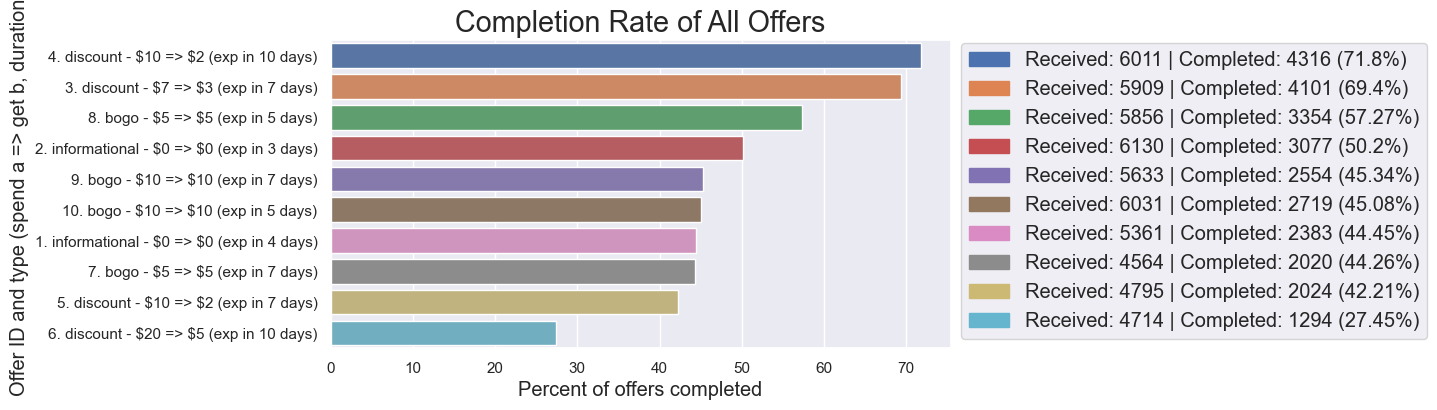

In [32]:
# Plot completed offer rates
plt.figure(figsize=(8, 4))
sns.barplot(data=comp_by_offer, x='pct_completed', y='offer', orient='h')
plt.legend(handles=[plt.Rectangle((0,0), 1, 1, color=color) for color in sns.color_palette()[:10]],
           labels=comp_by_offer.summary.tolist(), fontsize='large', bbox_to_anchor=(1, 1.025))
plt.title('Completion Rate of All Offers', fontsize='xx-large')
plt.ylabel('Offer ID and type (spend a => get b, duration)', fontsize='large')
plt.xlabel('Percent of offers completed', fontsize='large');

In [33]:
# Extract transactions
transactions = transcript.query('event == "transaction"').drop('event', axis=1)

# Merge with user data
transactions = pd.merge(transactions, profile, on='user_id', how='left')
transactions.head(2)

,time,amount,offer_id,reward,user_id,gender,age,income,signup_date
0,0,0.83,0,0,29,F,20,30000,2016-07-11
1,0,34.56,0,0,40,M,42,96000,2016-01-17


In [34]:
# Create a binary feature indicating whether the transaction amount was at least $1
transactions['gte1'] = transactions.amount.apply(lambda a: int(a >= 1))

# Calculate the frequency, monetary value for all users
fmt = transactions.groupby('user_id', as_index=False).agg({
    'gte1': 'sum', # frequency
    'amount': 'sum', # monetary
})
fmt.columns = ['user_id', 'frequency', 'monetary']

# Add users with no transactions
fmt = pd.merge(profile[['user_id', 'signup_date']], fmt, on='user_id', how='left')
fmt = fmt.set_index('user_id').fillna(0)
fmt['frequency'] = fmt.frequency.astype(int)

# Calculate a reference date for tenure - 30 days after the latest signup date
ref_date = profile.signup_date.max() + pd.Timedelta(30, 'days')

# Calculate the tenure for all users
fmt['tenure'] = fmt.signup_date.apply(lambda d: (ref_date - d).days // 30)
fmt.drop('signup_date', axis=1, inplace=True)

# Reduce FMT values into quantiles
fmt['F'] = pd.qcut(fmt.frequency, 6, range(1, 7)).astype(int)
fmt['M'] = pd.qcut(fmt.monetary, 8, range(1, 9)).astype(int)
fmt['T'] = pd.qcut(fmt.tenure, 3, range(1, 4)).astype(int)

# Aggregate quantile values
fmt['FMT'] = fmt['F'].astype(str) + fmt['M'].astype(str) + fmt['T'].astype(str) # concat as str for segment name
fmt['score'] = fmt['F'] + fmt['M'] + fmt['T'] # sum as int for customer score

fmt = pd.merge(fmt.reset_index(), profile, on='user_id', how='left')
fmt.head(2)

,user_id,frequency,monetary,tenure,F,M,T,FMT,score,gender,age,income,signup_date
0,1,3,77.01,13,1,4,2,142,7,F,55,112000,2017-07-15
1,2,7,159.27,15,3,6,2,362,11,F,75,100000,2017-05-09


In [35]:
# Group "female" and "other" gender into a new binary feature
fmt['male'] = (fmt.gender == 'M').astype(int)
fmt.head(2)

,user_id,frequency,monetary,tenure,F,M,T,FMT,score,gender,age,income,signup_date,male
0,1,3,77.01,13,1,4,2,142,7,F,55,112000,2017-07-15,0
1,2,7,159.27,15,3,6,2,362,11,F,75,100000,2017-05-09,0


In [39]:
# Normalize features
scaler = StandardScaler()
scaled = scaler.fit_transform(fmt[['male', 'age', 'income', 'frequency', 'monetary', 'tenure']])
scaled

array([[-1.15670191,  0.03488876,  2.15741893, -1.00153504, -0.30792521,
        -0.35348851],
       [-1.15670191,  1.18543027,  1.60180089, -0.17241039,  0.3250357 ,
        -0.21030439],
       [ 0.86452697,  0.78274074,  0.2127558 , -1.00153504, -0.45627783,
        -0.99781705],
       ...,
       [ 0.86452697, -0.31027369,  0.35166031,  0.03487077, -0.59470436,
         0.07606385],
       [-1.15670191,  1.64564687, -0.71327427,  1.27855775,  0.55895269,
         0.86357651],
       [-1.15670191,  0.43757829,  0.76837384, -0.37969155,  0.19999783,
        -0.35348851]])

array([0.28691816, 0.26401487, 0.14821769, 0.13255764, 0.11507985])

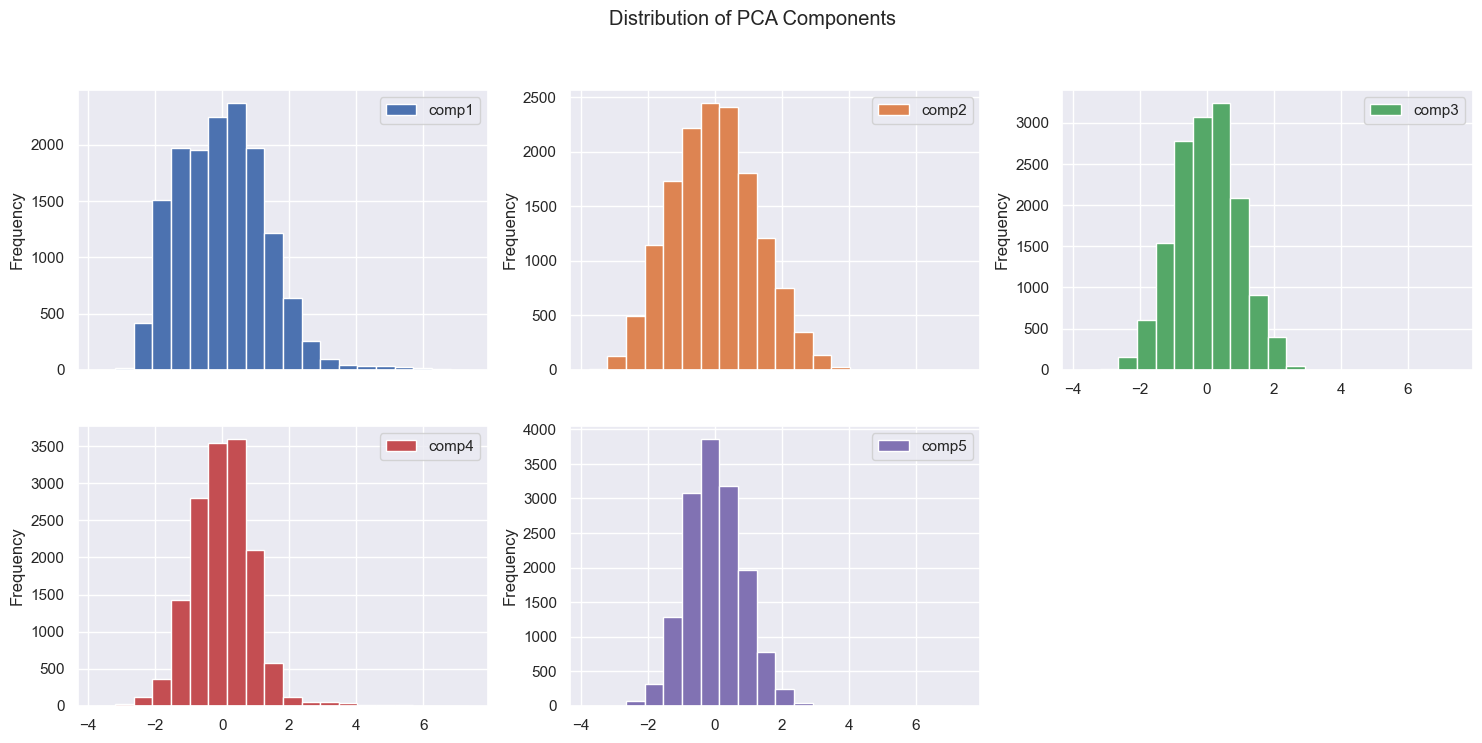

In [63]:
# PCA
pca = PCA(n_components=5, random_state=0)
user_pca = pd.DataFrame(pca.fit_transform(scaled), columns=['comp' + str(i) for i in range(1, 6)])
user_pca.plot(kind='hist', bins=20, figsize=(18, 8), subplots=True, layout=(2, 3),
                   title='Distribution of PCA Components')

# Add components to FMT data
fmt = pd.concat([fmt, user_pca], axis=1)
pca.explained_variance_ratio_

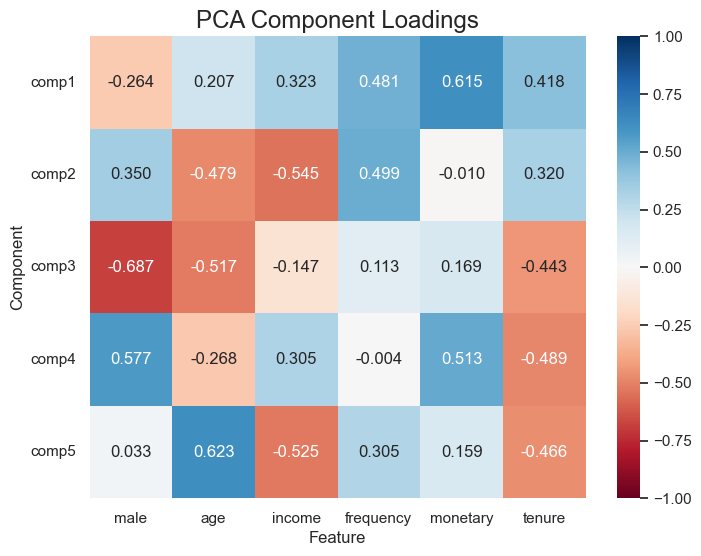

In [41]:
def heatmap(data, title, ylabel, xlabel='Feature', vmin=-1, vmax=1, cmap='RdBu'):
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(data, annot=True, vmin=vmin, vmax=vmax, cmap=cmap, fmt='.3f')
    plt.title(title, fontsize='x-large')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.yticks(rotation=0)
    plt.show()
    

# PCA component loadings
user_comps = pd.DataFrame(pca.components_, index=user_pca.columns,
                         columns=['male', 'age', 'income', 'frequency', 'monetary', 'tenure'])
heatmap(user_comps, 'PCA Component Loadings', 'Component')

/Users/sirawitwattano/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/sirawitwattano/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/sirawitwattano/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/sirawitwattano/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/sirawitwattano/Li

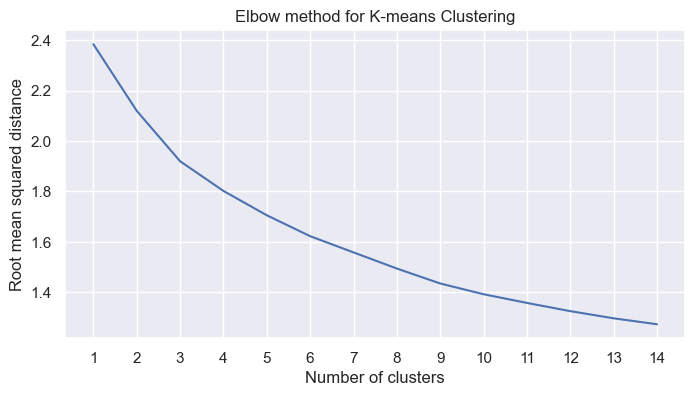

In [65]:
# Test different numbers of clusters
msd = [] # mean
for k in range(1, 15):
    kmeans = KMeans(k, random_state=0)
    kmeans.fit(user_pca)
    msd.append(np.sqrt(kmeans.inertia_ / user_pca.shape[0]))
    
# Elbow method
plt.figure(figsize=(8, 4))
sns.lineplot(x=range(1, 15), y=msd)
plt.title('Elbow method for K-means Clustering')
plt.ylabel('Root mean squared distance')
plt.xlabel('Number of clusters')
plt.xticks(range(1, 15), range(1, 15));

In [44]:
def segment_means(fmt_df, cols=['frequency', 'monetary', 'tenure'],
                  group_col='score', count_col='FMT'):
    
    df = fmt_df.groupby(group_col).mean()[cols].round(2)
    df['n_users'] = fmt_df.groupby(group_col)[count_col].count()
    df['pct_users'] = (100 * df.n_users / fmt_df.shape[0]).round(2)
    return df

# K-means clustering
kmeans = KMeans(4, random_state=0)
kmeans.fit(user_pca)
fmt['cluster'] = kmeans.labels_

# Cluster summary
feats = ['male', 'age', 'income', 'frequency', 'monetary', 'tenure', 'comp1', 'comp2', 'comp3', 'comp4', 'comp5']
cluster_means = segment_means(fmt, feats, 'cluster')
cluster_means

/Users/sirawitwattano/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/var/folders/3l/0fkxv44s4277cxxnlw4sjqmr0000gn/T/ipykernel_22084/3197482565.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,male,age,income,frequency,monetary,tenure,comp1,comp2,comp3,comp4,comp5,n_users,pct_users
cluster,,,,,,,,,,,,,
0,1.00,51.65,59045.97,4.78,47.89,8.69,-1.26,0.02,-0.34,0.51,0.12,4677,31.55
1,0.75,46.72,51996.04,12.80,116.66,32.37,0.54,1.52,-0.27,-0.38,-0.11,3531,23.82
2,0.45,63.56,87573.69,10.24,291.91,23.20,1.73,-0.54,-0.14,0.54,-0.03,2585,17.44
3,0.00,58.42,70311.26,5.48,85.43,12.65,-0.12,-1.00,0.71,-0.60,-0.02,4032,27.20


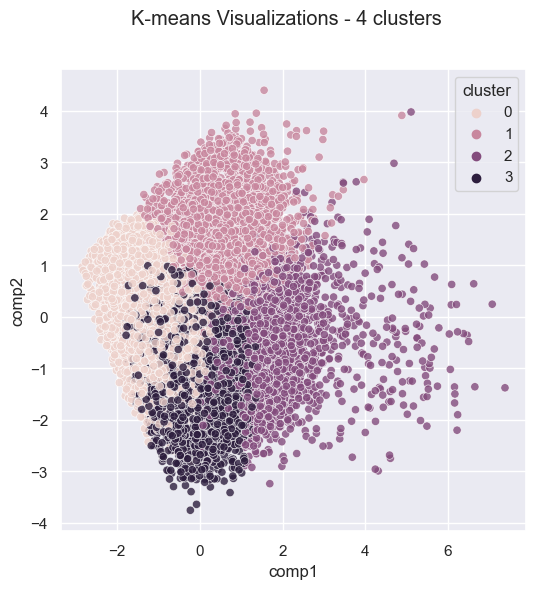

In [46]:
# Visualize clusters
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.scatterplot(data=fmt, x='comp1', y='comp2', hue='cluster', alpha=0.8) # first 2 components
fig.suptitle('K-means Visualizations - 4 clusters');

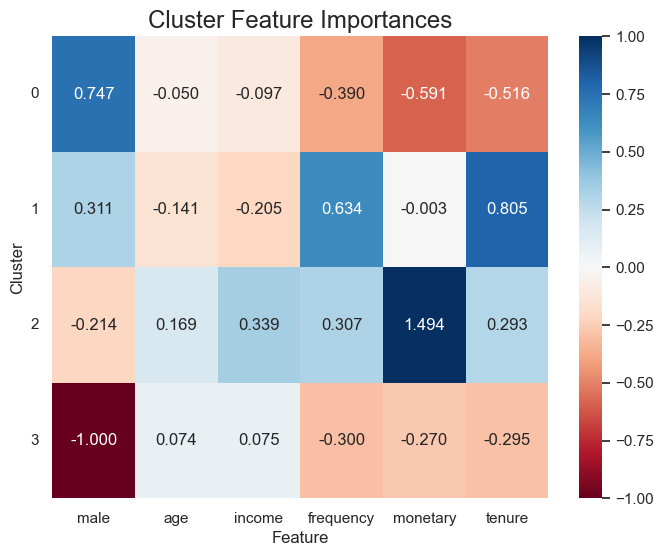

In [48]:
# Feature importances of
feats = ['male', 'age', 'income', 'frequency', 'monetary', 'tenure']
overall_means = fmt[feats].mean()
feat_importances = cluster_means.iloc[:, :6] / overall_means - 1
heatmap(feat_importances, 'Cluster Feature Importances', 'Cluster')

In [49]:
def snake_plot(segment_df, feats=['frequency', 'monetary', 'tenure'],
               normalize=True, segment_col='tier', user_col='user_id',
               title='Snake Plot', legend_title='Customer Tier', palette=None):
    
    # Set index
    if user_col in segment_df.columns:
        segment_df.set_index(user_col, inplace=True)
        
    # Normalize values
    if normalize:
        df = pd.DataFrame(StandardScaler().fit_transform(segment_df[feats]), index=segment_df.index, columns=feats)
        df[segment_col] = segment_df[segment_col]
    else:
        df = segment_df[feats]
        
    # Melt features
    melt = pd.melt(df.reset_index(),
                   id_vars=[user_col, segment_col], value_vars=feats,
                   var_name='Feature', value_name='Value')

    # Create a snake plot for customer segments
    title += ' for ' + legend_title + 's'
    sns.lineplot(data=melt, x='Feature', y='Value', hue=segment_col, palette=palette)
    plt.title(title, fontsize='x-large')
    plt.legend(title=legend_title, bbox_to_anchor=(1, 1))
    plt.show()

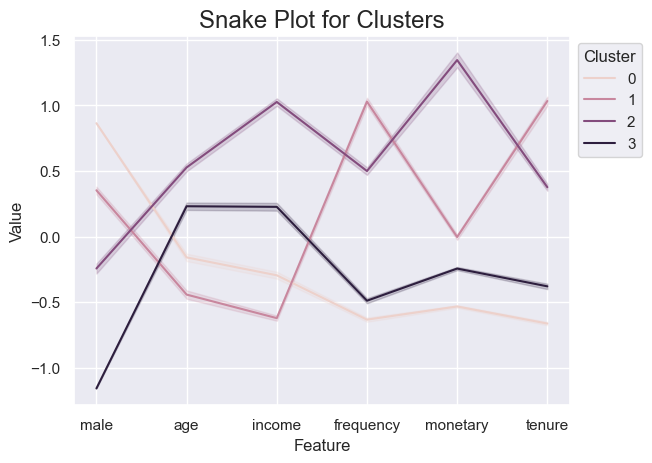

In [530]:
# Snake plot
snake_plot(fmt, feats, segment_col='cluster', legend_title='Cluster')

In [50]:
fmt['customer_cluster'] = fmt.cluster.map({0: 'Male and spend the least money',
                                           1: 'Low age, income and making frequent but small purchases',
                                           2: 'High age, income and large purchases',
                                           3: 'Female and spend relatively little'})
fmt.head(2)

,user_id,frequency,monetary,tenure,F,M,T,FMT,score,gender,...,income,signup_date,male,comp1,comp2,comp3,comp4,comp5,cluster,customer_cluster
0,1,3,77.01,13,1,4,2,142,7,F,...,112000,2017-07-15,0,0.190966,-2.206539,0.450535,0.000317,-1.337460,3,Female and spend relatively little
1,2,7,159.27,15,3,6,2,362,11,F,...,100000,2017-05-09,0,1.096733,-2.001638,0.074636,-0.226534,-0.042568,3,Female and spend relatively little


In [51]:
# Merge cluster data into offer events
offers = pd.merge(offers, fmt.reset_index()[['user_id', 'cluster', 'customer_cluster', 'monetary']], on='user_id', how='left')

# Extract true offers
true_offers = offers.query('event == "offer received" and group != 3')
print(true_offers.shape)
true_offers.head(2)

(55004, 21)


,index,event,time,offer_id,user_id,amount,reward,difficulty,duration,offer_type,...,social,web,expire_time,oid_uid,viewed,completed,group,cluster,customer_cluster,monetary
0,0,offer received,0,7,2,0.0,5,5,7,bogo,...,0,1,168,7_2,1,1,4,3,Female and spend relatively little,159.27
1,2,offer received,0,5,3,0.0,2,10,7,discount,...,0,1,168,5_3,1,0,2,0,Male and spend the least money,57.73


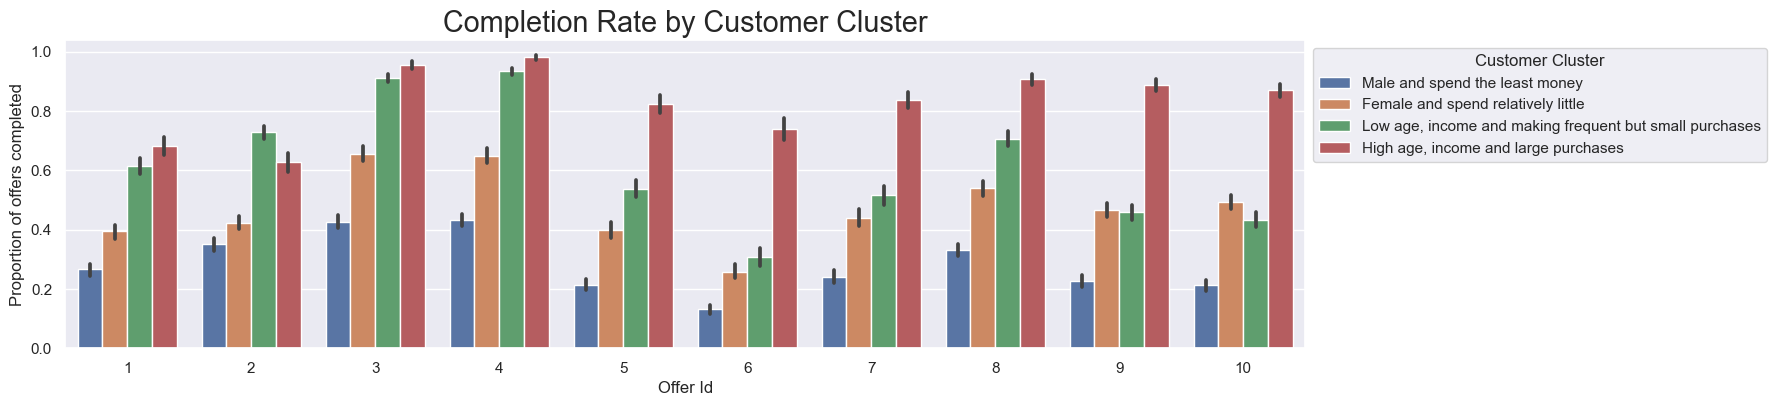

In [54]:
def plot_segment_completion(data, hue, hue_order, x='offer_id', y='completed', palette=None):
  
    title = hue.replace("_", " ").title()
    plt.figure(figsize=(16, 4))
    sns.barplot(data=data, x=x, y=y, hue=hue, hue_order=hue_order, palette=palette)
    plt.title(f'Completion Rate by {title}', fontsize='xx-large')
    plt.ylabel('Proportion of offers completed')
    plt.xlabel(x.replace('_', ' ').title())
    plt.legend(title=title, bbox_to_anchor=(1, 1))
    plt.show()

# Plot completion rate by cluster
plot_segment_completion(true_offers, hue='customer_cluster',
                        hue_order=true_offers.groupby('customer_cluster').monetary.mean().sort_values().index)

In [55]:
segment_means(fmt)

/var/folders/3l/0fkxv44s4277cxxnlw4sjqmr0000gn/T/ipykernel_22084/3197482565.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,frequency,monetary,tenure,n_users,pct_users
score,,,,,
3,1.62,6.35,5.01,951,6.41
4,2.66,12.58,7.47,943,6.36
5,3.53,26.82,7.08,1052,7.10
6,4.34,37.65,8.59,1047,7.06
7,4.79,51.59,12.12,839,5.66
8,5.30,69.97,14.51,908,6.12
9,6.22,78.77,19.03,921,6.21
10,7.40,92.34,21.26,1026,6.92
11,8.90,107.15,24.83,1300,8.77


In [56]:
# Create 3 customer tiers based on score: 3 - 7, 8 - 12, 13 - 17
fmt['tier'] = (fmt.score + 2) // 5
fmt['customer_tier'] = fmt.tier.map({1: 'Bronze', 2: 'Silver', 3: 'Gold'})

# Calculate the FMT means and user counts for each tier segment 
segment = segment_means(fmt, group_col='tier')
segment

/var/folders/3l/0fkxv44s4277cxxnlw4sjqmr0000gn/T/ipykernel_22084/3197482565.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,frequency,monetary,tenure,n_users,pct_users
tier,,,,,
1,3.38,26.66,7.95,4832,32.59
2,7.77,98.70,21.04,5373,36.24
3,12.56,232.85,24.77,4620,31.16


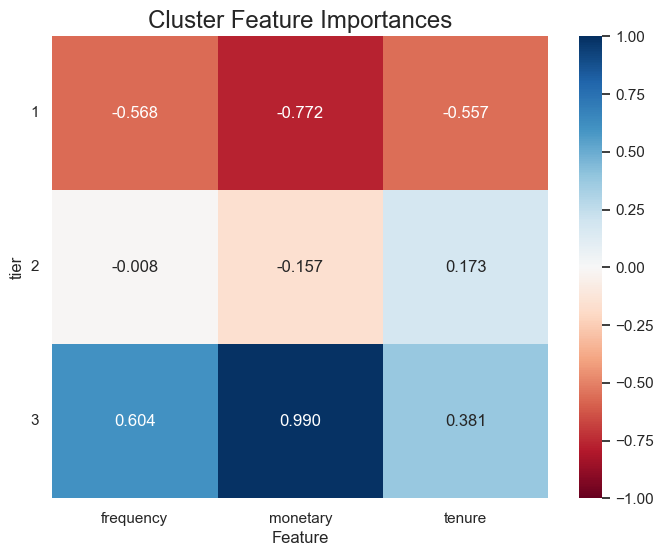

In [57]:
# Feature importances of
feats = ['frequency', 'monetary', 'tenure']
overall_means = fmt[feats].mean()
feat_importances = segment.iloc[:, :3] / overall_means - 1
heatmap(feat_importances, 'Cluster Feature Importances', 'tier')

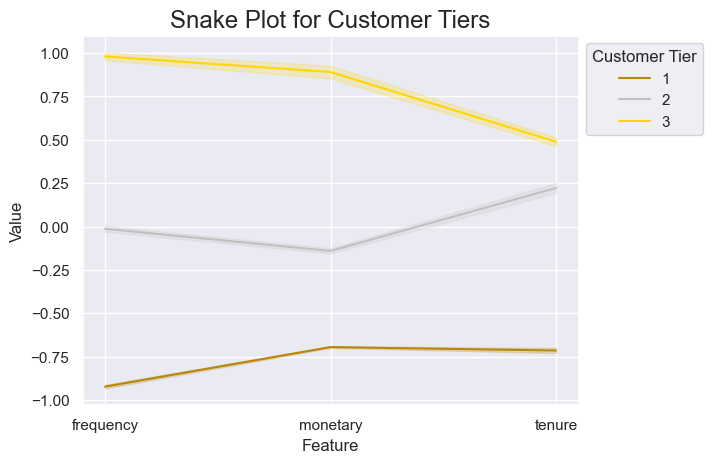

In [58]:
snake_plot(fmt, palette=['darkgoldenrod', 'silver', 'gold'])

In [59]:
# Merge FMT data into offer events
offers = pd.merge(offers, fmt.reset_index()[['user_id', 'frequency', 'monetary', 'tenure', 'customer_tier']], on='user_id', how='left')

# Extract true offers
true_offers = offers.query('event == "offer received" and group != 3')
print(true_offers.shape)
true_offers.head(2)

(55004, 25)


,index,event,time,offer_id,user_id,amount,reward,difficulty,duration,offer_type,...,viewed,completed,group,cluster,customer_cluster,monetary_x,frequency,monetary_y,tenure,customer_tier
0,0,offer received,0,7,2,0.0,5,5,7,bogo,...,1,1,4,3,Female and spend relatively little,159.27,7,159.27,15,Silver
1,2,offer received,0,5,3,0.0,2,10,7,discount,...,1,0,2,0,Male and spend the least money,57.73,3,57.73,4,Bronze


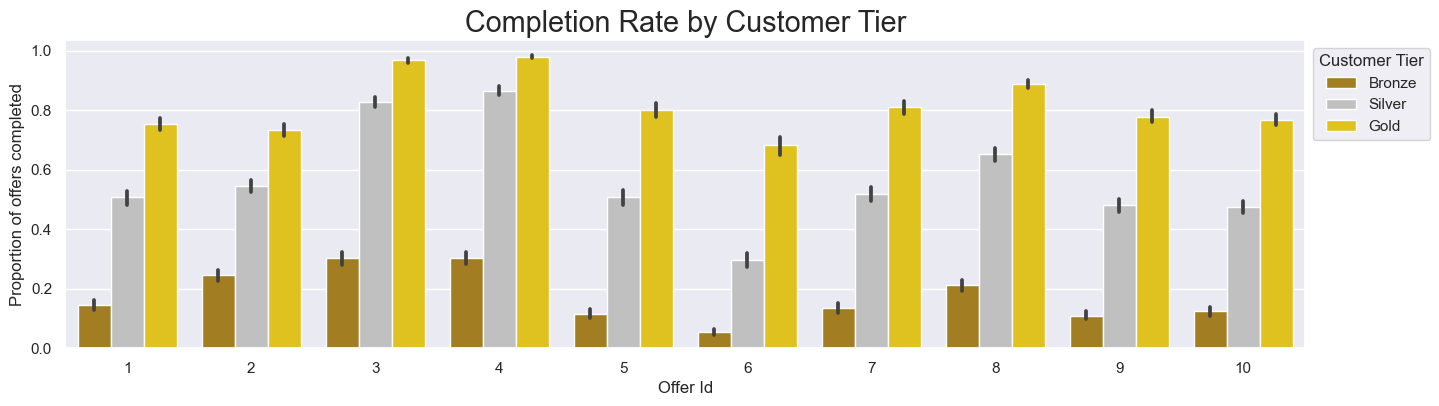

In [60]:
plot_segment_completion(true_offers, 'customer_tier', ['Bronze', 'Silver', 'Gold'],
                        palette=['darkgoldenrod' ,'silver', 'gold'])